# Serial Models in Data Science - Assignment 2

## Part II - Bayesian Regression

### Submitted by: 


Tamar Entin - 210014411 <br/>
Guy Shafir - 315941799

### Table of Contents:

<a id="home"></a>


| Section| Topic |
| :- | :- |
| 1 |  [GENERAL REGRESSION PROBLEM](#REGRESSION_PROBLEM) | 
| 2 |  [COMPUTE THE POSTERIOR OF w](#POSTERIOR) | 
| 3 |  [THE GAUSSIAN NATURE OF THE POSTERIOR AND THE PREDICTION](#GAUSSIAN_NATURE) | 
| 4 |  [SPARSE BAYESIAN LEARNING](#SPARSE_BAYESIAN) | 
| 5 |  [RELEVANCE VECTOR MACHINE (RVM)](#RVM) | 

[Go to the beginning of the assignment](#home)
<a id="REGRESSION_PROBLEM"></a><br/><br/>
<u> GENERAL REGRESSION PROBLEM </u>

#### General Regression Problem:

We are given $n$ sampling times $x_1;\, \dots;\, x_n$ and $n$ corresponding targets $y_1;\, \dots;\, y_n$. For each $i$, we define a radial function:

$$\phi_i (x) = \exp \left( -\frac{\left( x-x_i \right)^2}{r^2} \right)$$

The regression model is defined as the function $y\left(x;\, w\right) =\sum_{i=1}^n w_i \phi_i \left(x\right)$, where $w=\left(w_1;\,\dots;\,w_n\right)$ is a vector of weights to be determined.

We assume that the targets are related to the model by an additive noise $\varepsilon_i$ as follows:

$$
y_i = y\left(x_i;\,w\right)+\varepsilon_i
$$

The noise samples are assumed to be independent and identically distributed as $N\left(0;\,\sigma^2\right)$.

[Go to the beginning of the assignment](#home)
<a id="POSTERIOR"></a><br/><br/>
<u>COMPUTE THE POSTERIOR OF w</u>

#### 1. Write the likelyhood of $w$.

Given the regression model:

$$
y\left(x;\, w\right) =\sum_{i=1}^n w_i \phi_i \left(x\right)
$$

And the noise assumption:

$$
y_i = y\left(x_i;\,w\right)+\varepsilon_i
$$

The likelihood function $L\left(w\right)$ can be written as:

$$
L\left(w; y, \sigma^{2}\right) = f\left(y; w, \sigma^{2}\right) = \prod_{i=1}^{n} f\left(y_{i}; w, \sigma^{2}\right) = \prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp \left(-\frac{1}{2 \sigma^{2}}\left(y_{i}-y\left(x_{i}, w\right)\right)^{2}\right)= \frac{1}{(2\pi\sigma^2)^{n/2}}\exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n (y_i - y(x_i; w))^2\right)
$$

Simplifying the expression:

$$
L\left(w; y, \sigma^{2}\right) = \frac{1}{(2\pi\sigma^2)^{n/2}}\exp \left(-\frac{1}{2 \sigma^{2}} \sum_{i=1}^{n}\left(y_{i}-\sum_{j=1}^{n} w_{j} \phi_{j}\left(x_{i}\right)\right)^{2}\right) = \frac{1}{(2\pi\sigma^2)^{n/2}}\exp \left(-\frac{1}{2 \sigma^{2}}\|y-\Phi \omega\|^{2}\right)
$$


Which is the likelihood of $w$.


#### 2. We define the same prior for all weights: $N\left(0;\,\alpha^{-1}\right)$, where $\alpha>0$. Write the Bayes formula that defines the posterior distribution of $w$.

We know that the posterior is proportional to the product of the likelihood and the prior:

$$
\text{posterior} \propto \text{likelihood} \times \text{prior}
$$

The likelihood function is given by:
$$
L\left(w; y, \sigma^{2}\right) = \frac{1}{(2\pi\sigma^2)^{n/2}}\exp\left(-\frac{1}{2\sigma^2}\|y-\Phi \omega\|^2\right)
$$

Given the prior distribution for all weights: $\pi(w) = N\left(0;\,\alpha^{-1}\right)$, where $\alpha > 0$, we know that:

$$
\pi(w) = \prod_{i=1}^{n} \pi\left(w_{i}\right) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\alpha^{-1}}} \exp\left(-\frac{\alpha}{2}w_i^2\right) = \left(\frac{\alpha}{2 \pi}\right)^{\frac{n}{2}} \exp \left(-\frac{\alpha}{2} \sum_{i=1}^{n} w_{i}^{2}\right) = \left(\frac{\alpha}{2 \pi}\right)^{\frac{n}{2}} \exp \left(-\frac{\alpha}{2}\|w\|^{2}\right) 
$$


Multiplying the likelihood function by the prior, we obtain:

$$
p(w|y, \sigma^{2}) \propto \left(\frac{1}{(2\pi\sigma^2)^{n/2}}\exp\left(-\frac{1}{2\sigma^2}\|y-\Phi \omega\|^2\right)\right) \cdot \left(\left(\frac{\alpha}{2 \pi}\right)^{\frac{n}{2}} \exp \left(-\frac{\alpha}{2}\|w\|^2\right)\right)
$$

Simplifying the expression, we get:

$$
p(w|y, \sigma^{2}) \propto \exp\left(-\frac{1}{2\sigma^2}\|y-\Phi \omega\|^2 - \frac{\alpha}{2}\|w\|^2\right)
$$

This expression represents the posterior distribution of $w$.



#### 3. Prove that computing the MAP estimate of $w$ is equivalent to a regularised least-square problem. Write the relation that relates $\alpha$, $\sigma^2$, and $\lambda$, that is the regularisation parameter.


Given the expression for the posterior distribution of $w$,

$$
p(w|y, \sigma^{2}) \propto \exp\left(-\frac{1}{2\sigma^2}\|y-\Phi \omega\|^2 - \frac{\alpha}{2}\|w\|^{2}\right)
$$

Computing the Maximum a Posteriori (MAP) estimate of $w$ is equivalent to finding the $w$ that maximizes the posterior distribution:

$$
w_{MAP} = \underset{w}{\operatorname{argmax}}\ p(w|y, \sigma^2)
$$

Since the logarithm is a monotonic function, maximizing the logarithm of the posterior distribution is equivalent to maximizing the posterior distribution itself:

$$
w_{MAP} = \underset{w}{\operatorname{argmax}}\ \ln p(w|y, \sigma^2) = \underset{w}{\operatorname{argmax}}\ \left(-\frac{1}{2\sigma^2}\|y-\Phi \omega\|^2 - \frac{\alpha}{2}\|w\|^2\right)
$$

Maximizing the expression above is equivalent to minimizing its negation:

$$
w_{MAP} = \underset{w}{\operatorname{argmin}}\ \left(\frac{1}{2\sigma^2}\|y-\Phi \omega\|^2 + \frac{\alpha}{2}\|w\|^2\right)
$$

Comparing this expression to the regularized least-square problem, which is given by:

$$
w_{RLS} = \underset{w}{\operatorname{argmin}}\ \left(\|y-\Phi w\|^2 + \lambda\|w\|^2\right)
$$

We can see that the MAP estimate of $w$ is equivalent to a regularized least-square problem if we set:

$$
\lambda = \alpha \sigma^2
$$


[Go to the beginning of the assignment](#home)
<a id="GAUSSIAN_NATURE"></a><br/><br/>
<u>THE GAUSSIAN NATURE OF THE POSTERIOR AND THE PREDICTION</u>


In this section, we consider two lemmas. Note that you are not required to prove them:

**Lemma 1.** If random variables $x \in \mathbb{R}^n$ and $y \in \mathbb{R}^p$ have the Gaussian probability distributions:

$$
\begin{cases}
x \sim N(m, P) \\
y\,|\,x \sim N(Hx + u, R)
\end{cases}
$$

Then the joint distribution of $(x; y)$ and the marginal distribution of $y$ are given as:

$$
\begin{cases}
\begin{pmatrix} x \\ y \end{pmatrix} \sim N\left(\begin{pmatrix} m \\ Hm + u \end{pmatrix},\begin{pmatrix} P & PH^T \\ HP & HPH^T + R \end{pmatrix}\right) \\
y \sim N(Hm + u, HPH^T + R)
\end{cases}
$$

**Lemma 2.** If random variables $x \in \mathbb{R}^n$ and $y \in \mathbb{R}^m$ have the joint Gaussian probability distributions:

$$
\begin{pmatrix} x \\ y \end{pmatrix} \sim N\left(\begin{pmatrix} a \\ b \end{pmatrix},\begin{pmatrix} A & C \\ C^T & B \end{pmatrix}\right)
$$

Then the marginal and conditional distribution of $x$ and $y$ are given as follows:

$$
\begin{cases}
x \sim N(a, A) \\
y \sim N(b, B) \\
x\,|\,y \sim N\left(a + CB^{-1}(y - b), A - CB^{-1}C^T\right) \\
y\,|\,x \sim N\left(a + C^TA^{-1}(x - a), B - C^TA^{-1}C\right)
\end{cases}
$$

Assuming that $w = \left(w_1;\,\dots;\,w_n\right)^T$, $y = \left(y_1;\,\dots;\,y_n\right)$, and the matrix $\Phi$ is the same as defined in lectures, answer the two following questions:



#### 1. Relying on these lemmas, prove that the posterior distribution of $w$, i.e. $f\left(w\,|\,y;\,\alpha;\,\sigma^2\right)$ is $N\left(\mu;\,\Sigma\right)$, where: $\Sigma^{-1}=\frac{1}{\sigma^2}\Phi^T\Phi+\alpha I_n$ and $\mu=\frac{1}{\sigma^2}\Sigma\Phi^Ty$.

The prior distribution for $w$ is given by:

$$
\pi(w | \alpha) = \left(\frac{\alpha}{2 \pi}\right)^{\frac{n}{2}} \exp \left(-\frac{\alpha}{2}\|w\|^2\right)
$$

We can obtain the expression for the Gaussian distribution of $w|\alpha$ by considering the original prior distribution of $w$:

$$
\pi(w | \alpha) = \frac{1}{(2 \pi)^{0.5 n} |\Sigma|^{\frac{1}{2}}} \exp \left(-\frac{1}{2} (w - \mu)^{T} \Sigma^{-1} (w - \mu) \right)
$$

Now, substitute $\mu = 0$ and $\Sigma = \frac{1}{\alpha} I_n$ into the original Gaussian distribution expression:


$$
\pi(w | \alpha) = \frac{1}{(2 \pi)^{0.5 n}\left|\frac{1}{\alpha} I_{n}\right|^{0.5}} \exp \left(-\frac{1}{2} w^{T}\left(\frac{1}{\alpha} I_{n}\right)^{-1} w\right) \rightarrow w | \alpha \sim \mathcal{N}\left(0, \frac{1}{\alpha} I_n\right)
$$

The likelihood function is given by:

$$
f\left(y | w, \sigma^2\right) = \left(\frac{1}{2 \pi \sigma^2}\right)^{\frac{n}{2}} \exp \left(-\frac{1}{2 \sigma^2}\|y - \Phi w\|^2\right)
$$

We can rewrite this expression in the form of a multivariate Gaussian distribution:

$$
f\left(y | w, \sigma^2\right) = \frac{1}{(2 \pi)^{0.5 n}\left|\sigma^2 I_{n}\right|^{0.5}} \exp \left(-\frac{1}{2}(y - \Phi w)^{T}\left(\sigma^2 I_{n}\right)^{-1}(y - \Phi w)\right) \rightarrow y | w, \sigma^2 \sim \mathcal{N}\left(\Phi w, \sigma^2 I_n\right)
$$

We have two random variables $w, y \in \mathbb{R}^{n}$ with Gaussian probability distributions:

$$
\begin{cases}
w | \alpha \sim \mathcal{N}\left(0, \frac{1}{\alpha} I_n\right) \\
y | w, \sigma^2 \sim \mathcal{N}\left(\Phi w, \sigma^2 I_n\right)
\end{cases}
$$

Using **Lemma 1**, we can write the joint distribution of $(w; y)$ as:

$$
\begin{pmatrix}
w \\
y
\end{pmatrix} \sim N\left(\begin{pmatrix}
0 \\
\Phi 0
\end{pmatrix}, \begin{pmatrix}
\frac{1}{\alpha} I_{n} & \frac{1}{\alpha} \Phi^{T} \\
\frac{1}{\alpha} \Phi & \frac{1}{\alpha} \Phi \Phi^{T}+\sigma^{2} I_{n}
\end{pmatrix}\right)
$$

Now, we can use **Lemma 2** to find the conditional distribution $w\,|\,y$. To do this, we first need to identify $a, b, A, B$ and $C$ in the joint distribution.


Here, we have:

$$
a = 0, \quad b = \Phi 0 = 0, \quad A = \frac{1}{\alpha} I_{n}, \quad B = \frac{1}{\alpha} \Phi \Phi^{T}+\sigma^{2} I_{n}, \quad C = \frac{1}{\alpha} \Phi^{T}
$$



Using the formula for the conditional distribution $w\,|\,y$ from **Lemma 2**:

$$
w\,|\,y \sim N\left(a + CB^{-1}(y - b), A - CB^{-1}C^T\right)
$$

First, let's calculate $CB^{-1}(y - b)$:


$$
CB^{-1}(y - b) = \frac{1}{\alpha} \Phi^{T} \left(\frac{1}{\alpha} \Phi \Phi^{T}+\sigma^{2} I_{n}\right)^{-1} (y - 0) = \frac{1}{\sigma^2} \Phi^{T} \left(\frac{1}{\sigma^2} \Phi \Phi^{T}+\alpha I_{n}\right)^{-1} y
$$

Now, we can calculate $A - CB^{-1}C^T$:

- We know that for matrices M, N: $(M+N)^{-1}=M^{-1}-M^{-1} N(M+N)^{-1}$.

$$
\begin{aligned}
A - CB^{-1}C^T &= \frac{1}{\alpha} I_{n} - \frac{1}{\alpha} \Phi^{T} \left(\frac{1}{\alpha} \Phi \Phi^{T}+\sigma^{2} I_{n}\right)^{-1} \frac{1}{\alpha} \Phi \\
&= \left(\frac{1}{\sigma^2} \Phi^{T} \Phi + \alpha I_{n}\right)^{-1}
\end{aligned}
$$

Therefore, the conditional distribution $w\,|\,y$ is given by:

$$
w\,|\,y \sim N\left(\frac{1}{\sigma^2} \Phi^{T} \left(\frac{1}{\sigma^2} \Phi \Phi^{T}+\alpha I_{n}\right)^{-1} y, \left(\frac{1}{\sigma^2} \Phi^{T} \Phi + \alpha I_{n}\right)^{-1}\right)
$$

Hence, the posterior distribution of $w$ is $f\left(w\,|\,y;\,\alpha;\,\sigma^2\right) \sim \mathcal{N}\left(\mu, \Sigma\right)$, with:

$$\Sigma^{-1} = \frac{1}{\sigma^2}\Phi^T\Phi + \alpha I_n$$

and

$$
\mu = \frac{1}{\sigma^2} \Phi^{T} \left(\frac{1}{\sigma^2} \Phi \Phi^{T}+\alpha I_{n}\right)^{-1} y = \frac{1}{\sigma^2} \Sigma \Phi^{T} y
$$



#### 2. Relying on these lemmas, prove that the prediction distribution of $y_*$ for a new point $x_*$, i.e. $f\left(y_*\,|\,y\right)=\int f\left(y_*\,|\,w;\,\hat{\sigma}^2;\,y\right)\pi\left(w\,|\,\hat\alpha\right)\,dw$ is $N\left(\mu_0;\,\sigma_*\right)$, where: $\sigma_* = \hat{\sigma}^2+f^T\Sigma f$ and $\mu_*=y\left(x_*;\,\mu\right)$, where $\mu$ and $\Sigma$ are defined by $f\left(w\,|\,y;\,\hat\sigma^2;\,\hat\alpha\right)=N\left(\mu;\,\Sigma\right)$ and $f=\left(\phi_1(x_*);\,\dots;\,\phi_n(x_*)\right)^T$. Here $\hat\sigma^2$ and $\hat \alpha$ are the values of $\sigma^2$ and $\alpha$ given by type II maximum likelyhood.

We begin with the distributions derived in the previous solution:

$$
w\,|\,y,\hat{\sigma}^2,\hat{\alpha} \sim \mathcal{N}(\mu,\Sigma) \qquad \text{and} \qquad y_*\,|\,w \sim \mathcal{N}(f^T w,\hat{\sigma}^2)
$$

where $f=(\phi_1(x_*), \dots, \phi_n(x_*))^T$. 

Using **Lemma 1**, we can express the joint distribution of $(w\,|\,y,\hat{\sigma}^2,\hat{\alpha},y_*)$ as:

$$
\begin{pmatrix}
w\,|\,y,\hat{\sigma}^2,\hat{\alpha}\\
y_*
\end{pmatrix} \sim \mathcal{N}\left(
\begin{pmatrix}
\mu\\
f^T\mu
\end{pmatrix}, \begin{pmatrix}
\Sigma & \Sigma f \\
f^T \Sigma & f^T\Sigma f + \hat{\sigma}^2
\end{pmatrix}\right)
$$

Using **Lemma 2**, we can find the conditional distribution of $y_*$ given $y$. It turns out that $y_*\,|\,y$ follows a Gaussian distribution:

$$
y_*\,|\,y \sim \mathcal{N}(\mu_*,\sigma_*^2)
$$

where:

$$
\mu_* = f^T\mu = y(x_*;\mu)
$$

and:

$$
\sigma_*^2 = f^T\Sigma f + \hat{\sigma}^2
$$

Therefore, the prediction distribution of $y_*$ for a new point $x_*$ is given by:

$$
f(y_*\,|\,y) = \int f(y_*\,|\,w;\hat{\sigma}^2;y)\pi(w\,|\,\hat{\alpha};y)\,dw = \mathcal{N}(\mu_*,\sigma_*)
$$



[Go to the beginning of the assignment](#home)
<a id="SPARSE_BAYESIAN"></a><br/><br/>
<u>SPARSE BAYESIAN LEARNING</u>


The prior of each component $w_i$ is now set separately $w_i\sim N\left(0;\alpha_i^{-1}\right)$, where $\alpha_i>0$. The different components are assumed to be independent. Let $\alpha=\left(\alpha_1;\,\dots;\,\alpha_n\right)$.

The posterior of the whole set of parameters is given by: $$f\left(w;\, \alpha;\,\sigma^2\,|\,y\right) = f\left(w\,|\,y;\,\alpha;\,\sigma^2\right)\pi\left(\alpha;\,\sigma^2\right)$$

We shall write from now $\beta$ for $\frac{1}{\sigma^2}$ in order to make the equations less cluttered.


#### 1. Show that $f\left(w\,|\,y;\,\alpha;\,\beta\right)=N\left(m;\,\Sigma\right)$, where: $$\matrix{m=\beta\Sigma\Phi^Ty\\ \Sigma=\left(A+\beta\Phi^T\Phi\right)^{-1}}$$ with $A=\text{diag}\,\alpha$ and the matrix $\Phi$ is the same matrix as before.

Given the prior distribution for each component $w_i$:

$$w_i \sim \mathcal{N}\left(0, \alpha_i^{-1}\right), \text{ where } \alpha_i > 0$$

The prior distribution for the entire $w$ is:

$$\pi(w | \alpha) = \prod_{i=1}^n \pi(w_i | \alpha) = \prod_{i=1}^{n} \sqrt{\frac{a_{i}}{2 \pi}} \exp \left(-\frac{\alpha_{i}}{2} w_{i}^{2}\right)=\frac{1}{(2 \pi)^{0.5 n}\left(\Pi_{i=1}^{n} \alpha_{i}^{-1}\right)^{0.5}} \exp \left(-\frac{1}{2} \sum_{i=1}^{n} \alpha_{i} w_{i}^{2}\right) = \frac{1}{(2\pi)^{0.5n} |A^{-1}|^{0.5}} \exp\left(-\frac{1}{2} w^T A w\right)$$

From here, we can conclude that $\pi(w | \alpha) = \mathcal{N}\left(0, A^{-1}\right)$.

Now, we can write the joint distribution using the **First Lemma**:

$$
\left(\begin{array}{c}
w | \alpha \\
y | \beta, \alpha
\end{array}\right) \sim \mathcal{N}\left(\left(\begin{array}{l}
0 \\
0
\end{array}\right),\left(\begin{array}{cc}
A^{-1} & A^{-1} \Phi^T \\
\Phi A^{-1} & \Phi A^{-1} \Phi^T + \frac{1}{\beta} I_n
\end{array}\right)\right)
$$

Using the **Second Lemma**, we can obtain the posterior distribution for $w$:
 
$$
\begin{aligned}
& \Sigma = A^{-1} - A^{-1} \Phi^T\left(\Phi A^{-1} \Phi^T + \frac{1}{\beta} I_n\right)^{-1} \Phi A^{-1} 
  = A^{-1} - A^{-1} \Phi^T\left(A^{-1} \Phi^T + \frac{1}{\beta} \Phi^{-1}\right)^{-1} A^{-1} \\
&  = A^{-1} - A^{-1} \beta \Phi^T\left(\beta \Phi^T + A \Phi^{-1}\right)^{-1} 
  = A^{-1} - A^{-1} \beta \Phi^T \Phi\left(\beta \Phi^T \Phi + A\right)^{-1} 
  = \left(A + \beta \Phi^T \Phi\right)^{-1} 
& \\
& \\
& m = A^{-1} \Phi^T\left(\Phi A^{-1} \Phi^T + \frac{1}{\beta} I_n\right)^{-1} y = \left(\left(\Phi^T\right)^{-1} A\right)^{-1}\left(\Phi A^{-1} \Phi^T + \frac{1}{\beta} I_n\right)^{-1} y \\
& = \beta\left(\beta \Phi + \left(\Phi^T\right)^{-1} A\right)^{-1} y = \beta\left(\beta \Phi^T \Phi + A\right)^{-1} \Phi^T y = \beta \Sigma \Phi^T y
\end{aligned}
$$


Thus, the posterior distribution of $w$ is:

$$
f(w\,|\,y;\,\alpha;\,\beta) = \mathcal{N}\left(m, \Sigma\right)
$$

Where $\Sigma = \left(A + \beta \Phi^T \Phi\right)^{-1}$ and $m = \beta \Sigma \Phi^T y$.


#### 2. We want to compute the parameters $\alpha$ and $\beta$ using the Maximum Likelyhood principle. For that purpose show that the log-likelyhood $f\left(y\,|\,\alpha;\beta\right)$ is given by:$$\ln f\left(y\,|\,\alpha;\beta\right) = \frac{n}{2}\ln \beta-E(y)-\frac{1}{2}\ln|\Sigma|-\frac{n}{2}\ln\left(2\pi\right)+\frac{1}{2}\sum_{i=1}^n\ln\alpha_i$$ where $E(y) = \frac{1}{2}\left(\beta y^Ty-m^T\Sigma^{-1}m\right)$. Once the log-likelyhood is given, one can design an iterative algorithm which estimates all the parameters.


We are given the equation:

$$
\begin{aligned}
f(y / \alpha, \beta) = \mathcal{N}\left(0, \Phi A^{-1} \Phi^{T}+\frac{1}{\beta} I_{n}\right) = \frac{1}{(2 \pi)^{n/2}\left|\Phi A^{-1} \Phi^{T}+\frac{1}{\beta} I_{n}\right|^{1/2}} \exp \left(-\frac{1}{2} Y^{T}\left(\Phi A^{-1} \Phi^{T}+\frac{1}{\beta} I_{n}\right)^{-1} y\right) = k e^{t}
\end{aligned}
$$

After the parametrization, we get: $\quad \ln f(y / \alpha, \beta) = \ln (k) + t$

We will now expand the term $t$, which represents the exponent part of the likelihood function:

$$
\begin{aligned}
t &= -\frac{1}{2} y^{T}\left(\Phi A^{-1} \Phi^{T}+\frac{1}{\beta} I_{n}\right)^{-1} y 
  = -\frac{1}{2} \beta y^{T}\left(\beta \Phi A^{-1} \Phi^{T}+I_{n}\right)^{-1} y \\
  &= -\frac{1}{2} \beta y^{T}\left(I_{n}-\beta \Phi A^{-1} \Phi^{T}\left(\beta \Phi A^{-1} \Phi^{T}+I_{n}\right)^{-1}\right) y 
  = -\frac{1}{2} \beta y^{T}\left(I_{n}-\beta \Phi\left(\left(\Phi^{T}\right)^{-1} A\right)^{-1}\left(\beta \Phi A^{-1} \Phi^{T}+I_{n}\right)^{-1}\right) y \\
  &= -\frac{1}{2} \beta y^{T}\left(I_{n}-\beta \Phi\left(\beta \Phi+\left(\Phi^{T}\right)^{-1} A\right)^{-1}\right) y
  = -\frac{1}{2} \beta y^{T}\left(I_{n}-\beta \Phi\left(\beta \Phi^{T} \Phi+A\right)^{-1} \Phi^{T}\right) y \\
  &= -\frac{1}{2} \beta y^{T}\left(I_{n}-\beta \Phi \Sigma \Phi^{T}\right) y 
  = -\frac{1}{2}\left(\beta y^{T} y-m^{T} \Sigma^{-1} m\right) 
  = -E(y)
\end{aligned}
$$

Now, we will expand the term $\ln (k)$:

$$
\begin{aligned}
\ln (k) &= -\frac{n}{2} \ln(2 \pi) - \frac{1}{2} \ln \left(\left|\Phi A^{-1} \Phi^{T}+\frac{1}{\beta} I_{n}\right|\right) 
        = -\frac{n}{2} \ln (2 \pi) + \frac{n}{2} \ln \beta - \frac{1}{2} \ln \left(\left|\beta \Phi A^{-1} \Phi^{T}+I_{n}\right|\right) \\
        &= -\frac{n}{2} \ln (2 \pi) + \frac{n}{2} \ln \beta - \frac{1}{2} \ln \left(\left|A^{-1}\right| \cdot\left|\beta \Phi^{T}+A \Phi^{-1}\right| \cdot|\Phi|\right) 
        = -\frac{n}{2} \ln (2 \pi) + \frac{n}{2} \ln \beta - \frac{1}{2} \ln \left(\left|A^{-1}\right| \cdot\left|\beta \Phi^{T} \Phi+A\right|\right) \\
        &= -\frac{n}{2} \ln (2 \pi) + \frac{n}{2} \ln \beta - \frac{1}{2} \ln \left(\left|A^{-1}\right| \cdot|\Sigma|\right) 
        = -\frac{n}{2} \ln (2 \pi) + \frac{n}{2} \ln \beta - \frac{1}{2} \ln |\Sigma|+\frac{1}{2} \ln \left(\prod_{i=1}^{n} \alpha_{i}\right) \\
        &= -\frac{n}{2} \ln (2 \pi) + \frac{n}{2} \ln \beta - \frac{1}{2} \ln |\Sigma|+\frac{1}{2} \sum_{i=1}^{n} \ln \alpha_{i}
\end{aligned}
$$


Finally, combining the terms:

$$
\begin{aligned}
\ln f(y / \alpha, \beta) = \frac{n}{2} \ln \beta - E(y) - \frac{1}{2} \ln |\Sigma| - \frac{n}{2} \ln (2 \pi) + \frac{1}{2} \sum_{i=1}^{n} \ln \alpha_{i}
\end{aligned}
$$






[Go to the beginning of the assignment](#home)
<a id="RVM"></a><br/><br/>
<u>RELEVANCE VECTOR MACHINE (RVM)</u>

The RVM process is an iterative one and involves repeatedly re-estimating $\alpha$ and $\beta$ until a stopping condition is met. In otder to implement the algorithm, we must first:

1. Select a suitable kernel function, i.e. a suitable radial function, for the dataset and relevant parameters. Use this kernel function to create the design matrix $\Phi$.
2. Establish a suitable convergence criteria for $\alpha$ and $\beta$, e.g. a threshold value $\delta_{\text{Threshold}}$ for the change between one iteration estimation of $\alpha$ and the next, i.e. $\delta = \sum_{i=1}^n |\alpha_i^{k+1}-\alpha_i^k|$ so that re-estimation will stop when $\delta<\delta_{\text{Threshold}}$.
3. Establish a threshold value $\alpha_{\text{Threshold}}$ which it is assumed an $\alpha_i$ is tending to infinity upon reaching it.
4. Choose starting values for $\alpha$ and $\beta$.

Then, the algorithm itself is described by the following steps:
- While $\delta<\delta_{\text{Threshold}}$ do:
  - Calculate $m=\beta\Sigma\Phi^Ty$ and $\Sigma=\left(A+\beta\Phi^T\Phi\right)^{-1}$
  - Update $\alpha_i=\frac{\gamma_i}{m_i^2}$, where $\gamma_i$ is computed relying on the previous values of $\alpha$ and $\Sigma$ by the following expression: $\gamma_i=1-\alpha_i\Sigma_{ii}$.
  - Update $\beta = \frac{N-\Sigma_i\gamma_i}{\|y-\Phi m\|^2}$.
  - Update $\delta$.
  - Prune the $\alpha_i$ and corresponding basis functions where $\alpha_i>\alpha_{\text{Threshold}}$.

Our hyperparameter values $\alpha$ and $\beta$ which result from the above procedure are those that maximise our marginal likelyhood and hence are those used when making a new estimate of a target value $y_*$ for a new input $x_*$: $$y_* = m^T\phi\left(x_*\right)$$ with $\phi\left(x_*\right) = \left(\phi_{i1}\left(x_*\right);\,\dots;\,\phi_{ip}\left(x_*\right)\right)$ where $p$ is the number of remaining basis functions. 

The variance relating to our confidence in this estimate is given by: $$\sigma_*^2=\beta^{-1}+\phi\left(x_*\right)^T\Sigma\phi\left(x_*\right)$$

Write a Python function that implements this algorithm. Give an example of this on a synthetic set of data that includes estimation of the new target at a new input.

### Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

### Data Generation

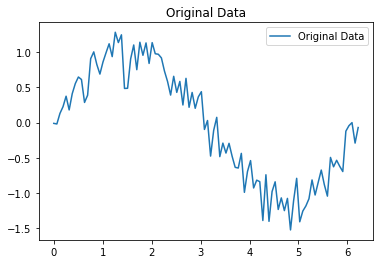

In [2]:
# Data Generation
N = 100
X = 2 * np.pi * np.arange(N) / N
eps = np.random.normal(0, 0.2, N)
Y = np.sin(X) + eps

# Plot Original Data
plt.plot(X, Y, label='Original Data')
plt.legend()
plt.title('Original Data')
plt.show()

### Constanats

In [3]:
DELTA_THRESHOLD = 1e-3
ALPHA_THRESHOLD = 1e9
KERNEL = rbf_kernel

### Algorithm

In [4]:
def rvm(X, y, kernel=KERNEL, delta_thresh=DELTA_THRESHOLD, alpha_thresh=ALPHA_THRESHOLD, alpha=1e-6, beta=1.e-6):
    num_of_samples = X.shape[0]
    phi = kernel(X, X)
    num_of_basis_functions = phi.shape[1]
    alpha_vec = alpha * np.ones(num_of_basis_functions)
    beta_vec = beta
    m_vec = np.zeros(num_of_basis_functions)
    relevance_vec = X

    prev_alpha = alpha_vec
    delta = delta_thresh + 1
    while (delta >= delta_thresh):
        # 1. Calculate m and Sigma
        i_s = np.diag(alpha_vec) + beta_vec * np.dot(phi.T, phi)
        sigma_vec = np.linalg.inv(i_s)
        m_vec = beta_vec * np.dot(sigma_vec, np.dot(phi.T, y))

        # 2. Update alpha
        gamma_vec = 1 - alpha_vec * np.diag(sigma_vec)
        alpha_vec = gamma_vec / (m_vec ** 2)

        # 3. Update beta
        beta_vec = (num_of_samples - np.sum(gamma_vec)) / (np.sum((y - np.dot(phi, m_vec)) ** 2))

        # 4. Prune alpha - retain where alpha < alpha_threshold
        should_retain_alpha = alpha_vec < alpha_thresh
        if not np.any(should_retain_alpha):
            should_retain_alpha[0] = True

        relevance_vec = relevance_vec[should_retain_alpha]
        alpha_vec = alpha_vec[should_retain_alpha]
        prev_alpha = prev_alpha[should_retain_alpha]
        gamma_vec = gamma_vec[should_retain_alpha]
        phi = phi[:, should_retain_alpha]
        sigma_vec = sigma_vec[np.ix_(should_retain_alpha, should_retain_alpha)]
        m_vec = m_vec[should_retain_alpha]

        # 5. Update delta
        delta = np.amax(np.absolute(alpha_vec - prev_alpha))
        prev_alpha = alpha_vec

    def predict(x):
        phi = rbf_kernel(x, relevance_vec)
        return np.dot(phi, m_vec)

    return predict

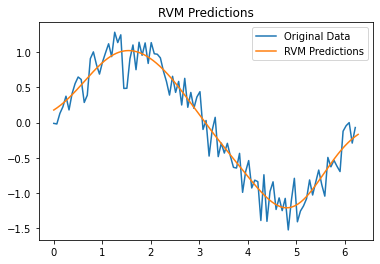

In [5]:
# Train RVM on the generated data
X = X.reshape(-1, 1)
predicting_func = rvm(X, Y)

# Make predictions
X_star = np.arange(0, 2 * np.pi, 0.01).reshape(-1, 1)
y_star = predicting_func(X_star)


# Plot RVM Predictions
plt.plot(X, Y, label='Original Data')
#plt.plot(X, Y, 'o', label='Original Data')
plt.plot(X_star, y_star, label='RVM Predictions')
plt.legend()
plt.title('RVM Predictions')
plt.show()